In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import numpy as np
import seaborn as sns 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [2]:
df_heart = pd.read_csv("../datasets/heart_cleveland_upload.csv")

print(df_heart)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  condition  
0        1   1     0          0  
1        0   2     

In [3]:
pd.set_option('display.max_columns', None)

# Muestra las primeras 10 filas
df_heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [4]:
duplicates = df_heart.duplicated()
total_duplicates = duplicates.sum()
print(f"Número de filas duplicadas: {total_duplicates}")

Número de filas duplicadas: 0


In [9]:
print(df_heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None


In [11]:
print(df_heart.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.9415

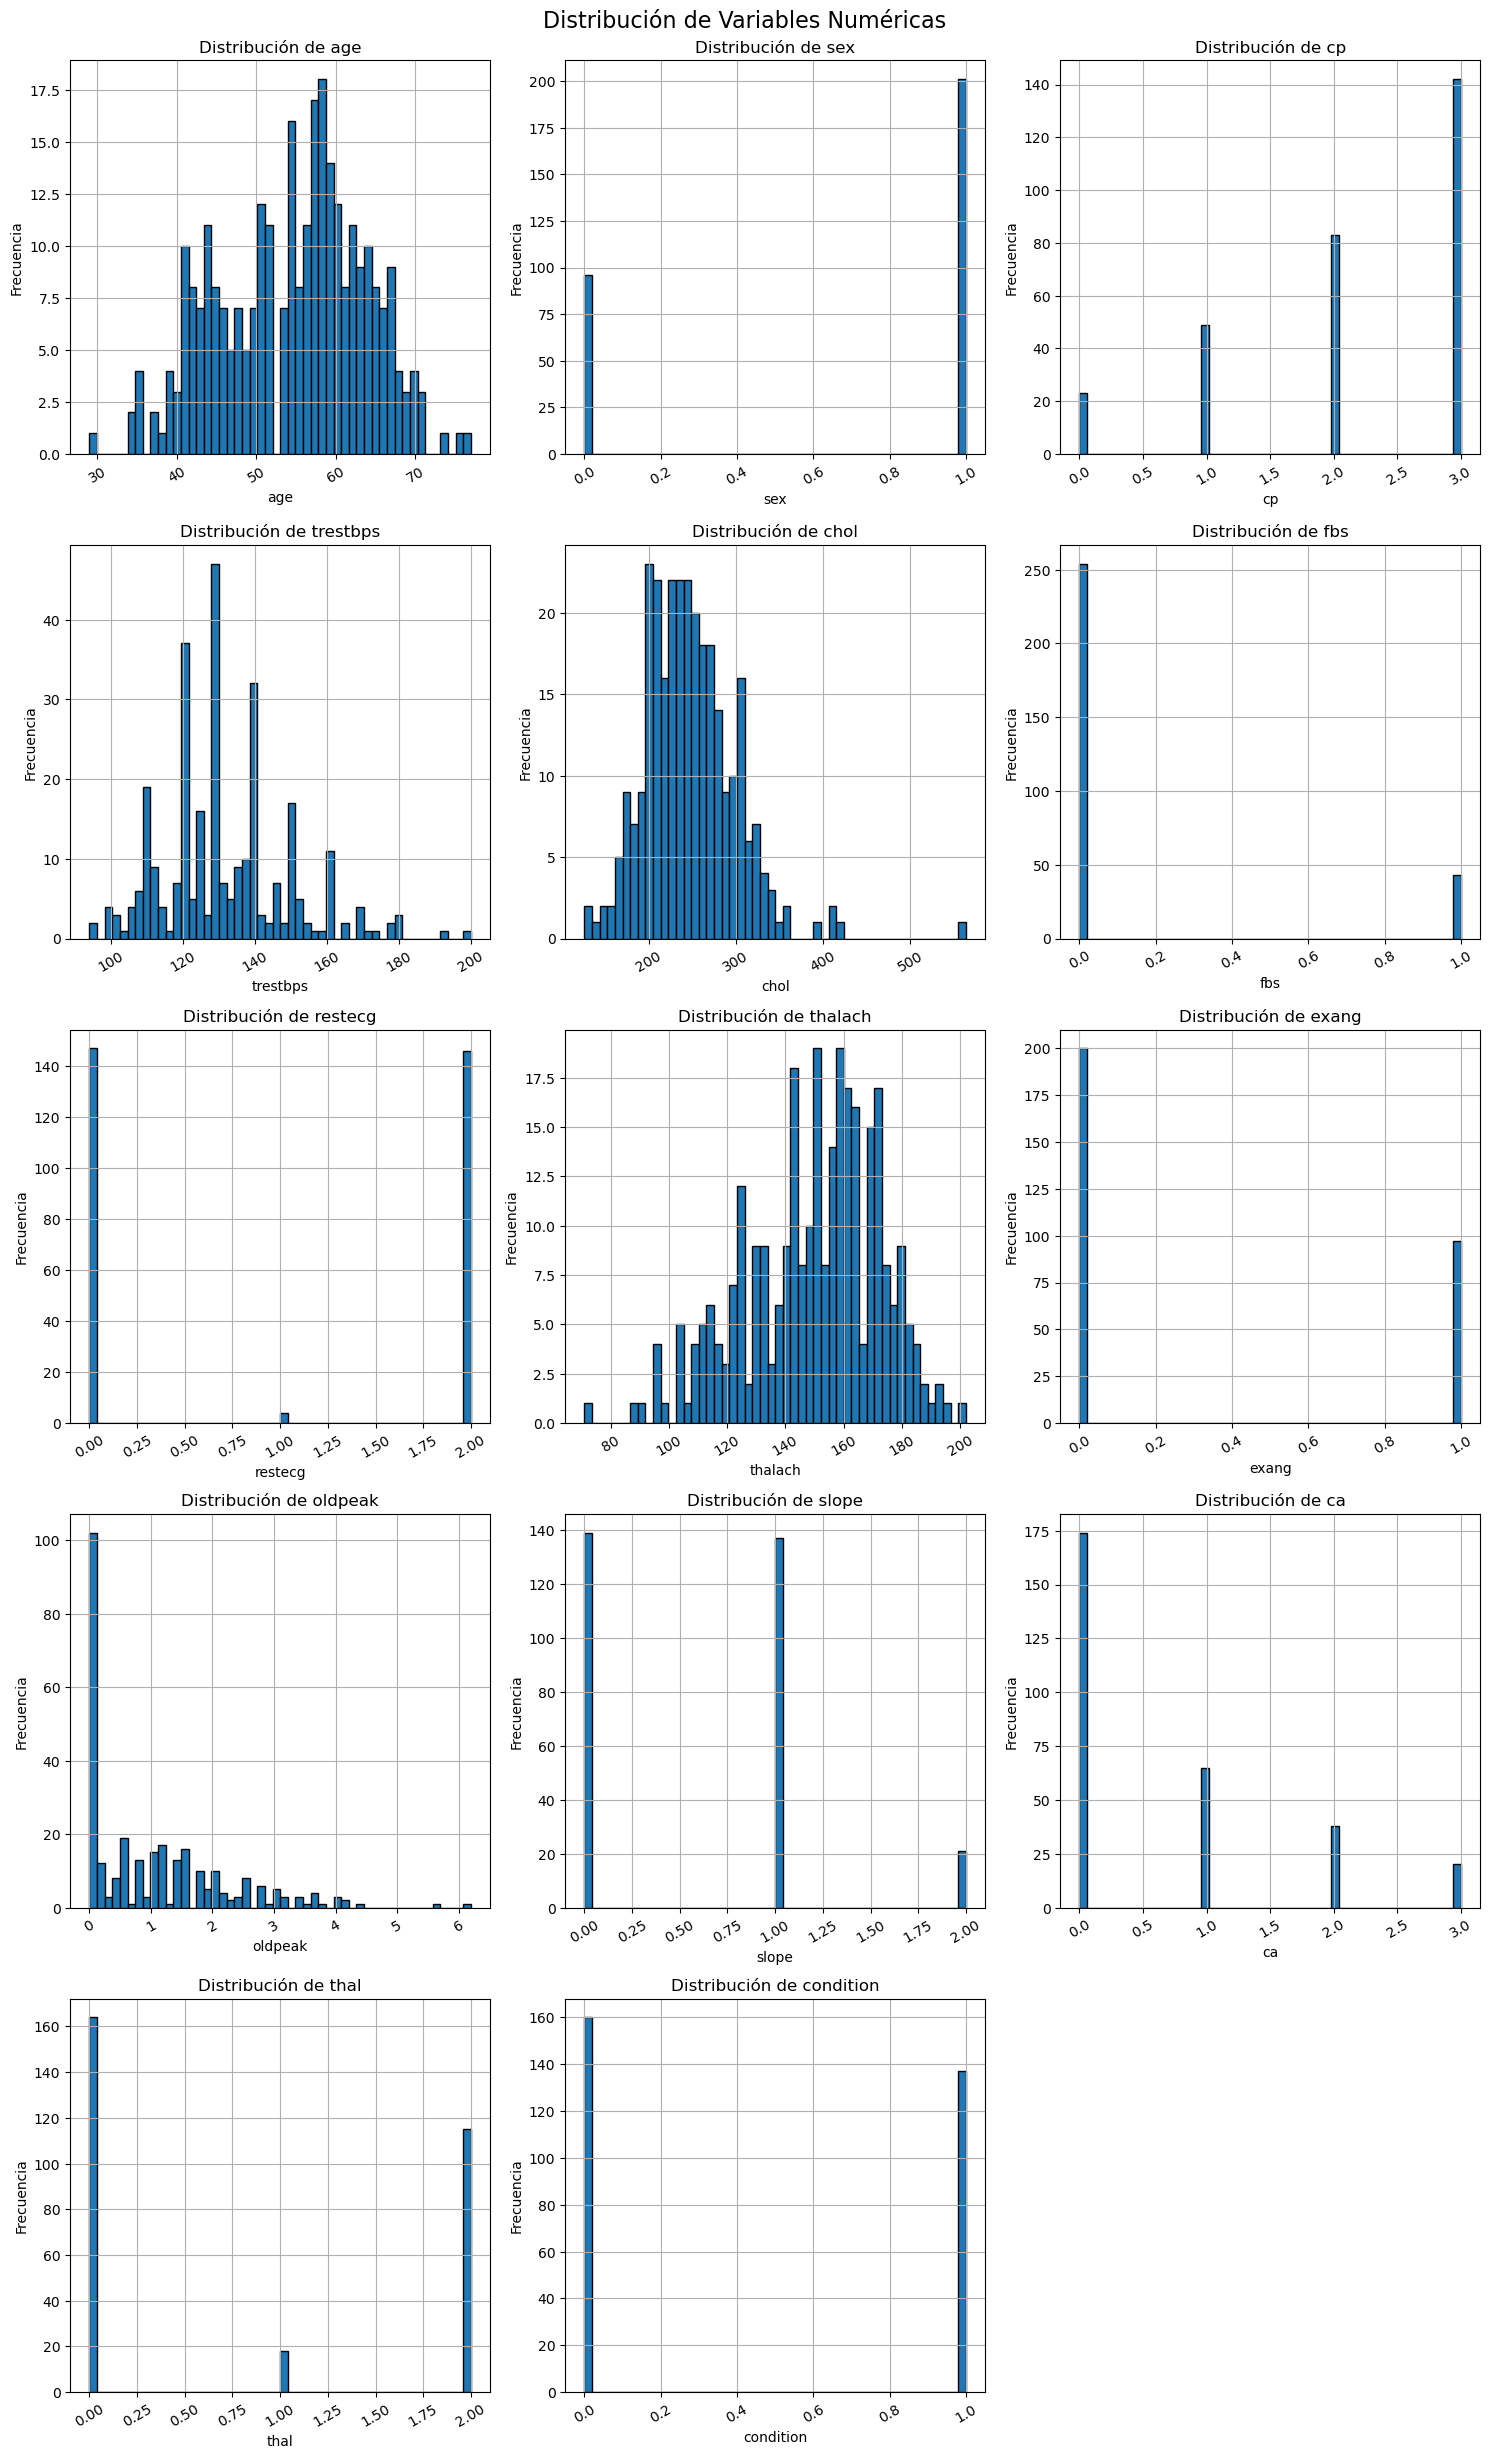

In [13]:
numbers_columns = df_heart.select_dtypes(include=[np.number]).columns

#Se calcula el número de filas y columnas para el subplot
n = len(numbers_columns)
n_rows = 5
n_cols = min(n, 3)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5*n_rows)) 
fig.suptitle('Distribución de Variables Numéricas\n', fontsize=16) 

# Aplanar el array 
axes = axes.flatten() 

# Crear histogramas para cada variable numérica 
for i, col in enumerate(numbers_columns): 
    ax = axes[i] 
    df_heart[col].hist(ax=ax, bins=50, edgecolor='black') 
    ax.set_title(f'Distribución de {col}') 
    ax.set_xlabel(col) 
    ax.set_ylabel('Frecuencia') 
    ax.tick_params(axis='x', rotation=30)

for j in range(i+1, len(axes)): 
    fig.delaxes(axes[j]) 
plt.tight_layout() 
plt.show() 

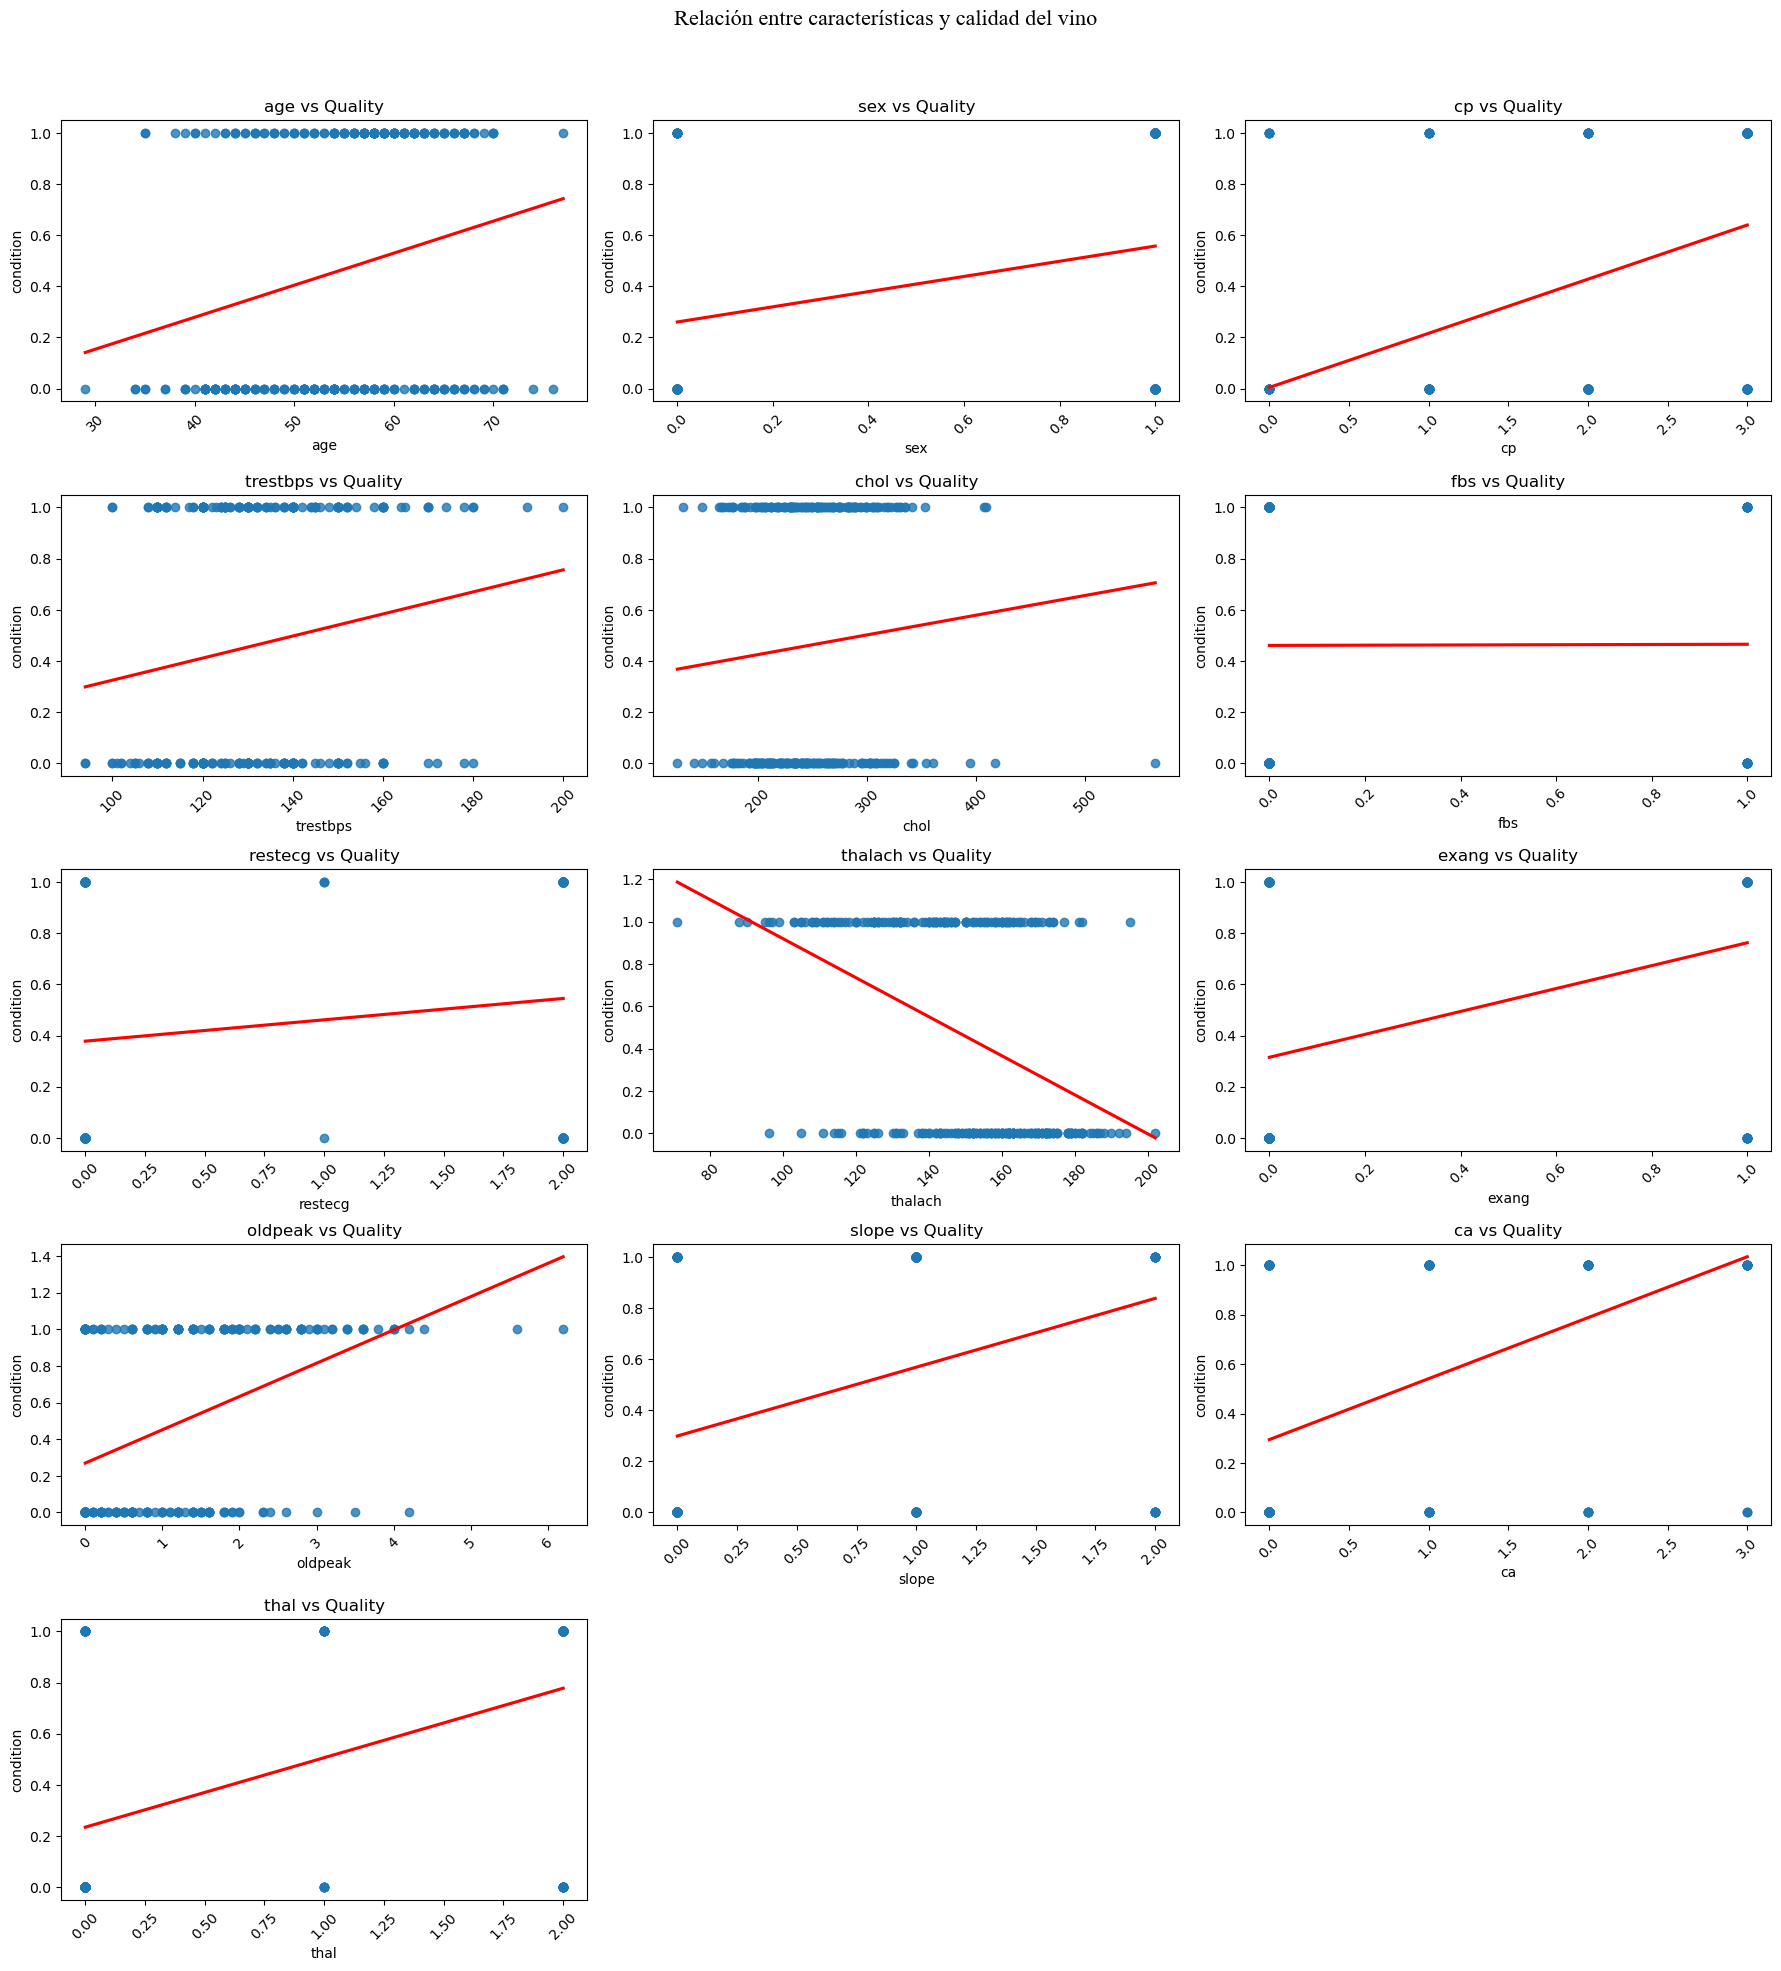

In [15]:
# Lista de todas las columnas excepto la variable target
features = [col for col in df_heart.columns if col != 'condition']

# Cantidad de gráficos por fila/columna
cols = 3
rows = (len(features) + cols - 1) // cols

# Crear subplots dinámicamente
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows), dpi=100)
axes = axes.flatten()  # aplanar para indexar fácilmente
plt.rcParams["font.family"] = "Times New Roman"
plt.subplots_adjust(hspace=0.5, wspace=0.4)

# Generar gráficos
for i, col in enumerate(features):
    sns.regplot(data=df_heart, x=col, y='condition', ax=axes[i], line_kws={"color": "red"}, ci=None)
    axes[i].set_title(f'{col} vs Quality')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar subplots vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Relación entre características y calidad del vino", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # espacio para el título
plt.show()


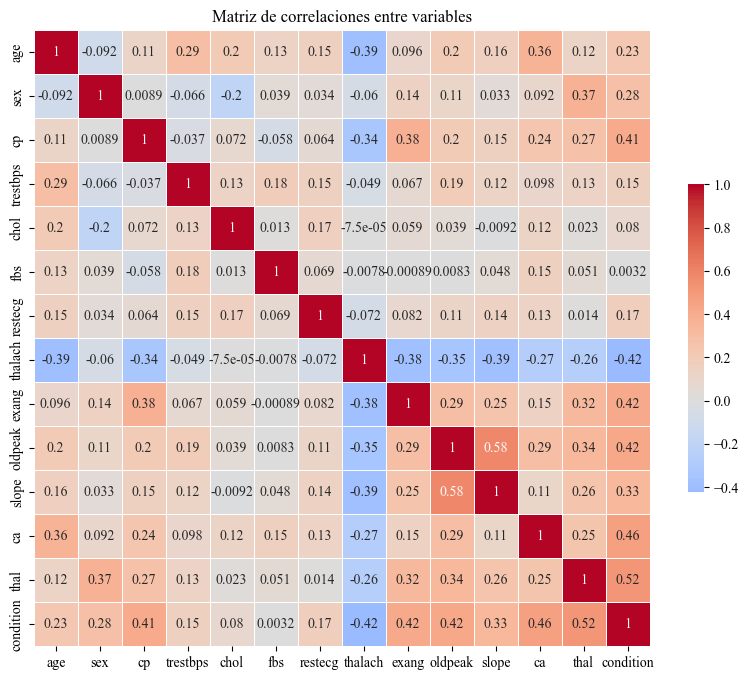

In [16]:
# Cálculo de correlación de variables

num_variables = df_heart.select_dtypes(include=[np.number]) 
# Calculamos la matriz de coeficientes de correlación entre las variables numéricas 
correlation = num_variables.corr() 
# Configuración del gráfico de correlación 

plt.figure(figsize=(10, 8)) 
# Gráfico de correlaciones utilizando un mapa de calor 
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, square=True, linewidths=.5, cbar_kws={"shrink": 0.5}) 
plt.title('Matriz de correlaciones entre variables') 
plt.show() 


Estadísticas para age:
Q1 - 1.5IQR = 28.50
Q1 = 48.00
Mediana = 56.00
Q3 = 61.00
Q3 + 1.5IQR = 80.50
Número de observaciones: 297
Número de outliers: 0


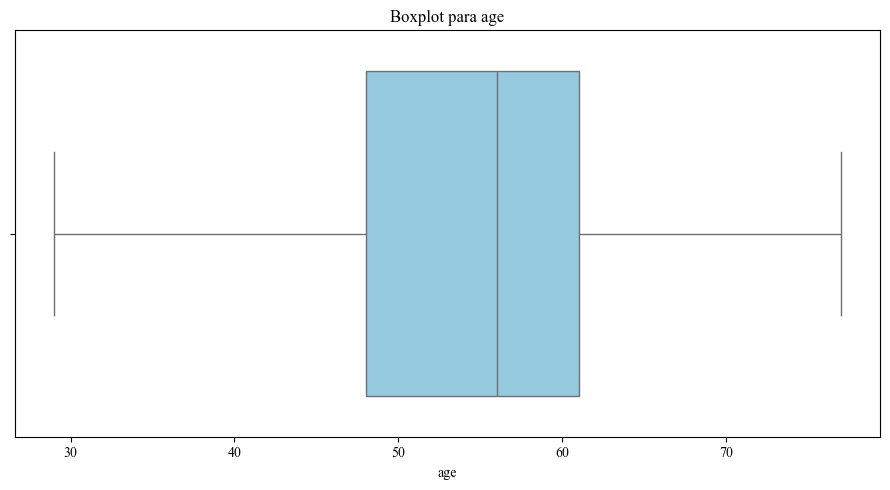


Estadísticas para sex:
Q1 - 1.5IQR = -1.50
Q1 = 0.00
Mediana = 1.00
Q3 = 1.00
Q3 + 1.5IQR = 2.50
Número de observaciones: 297
Número de outliers: 0


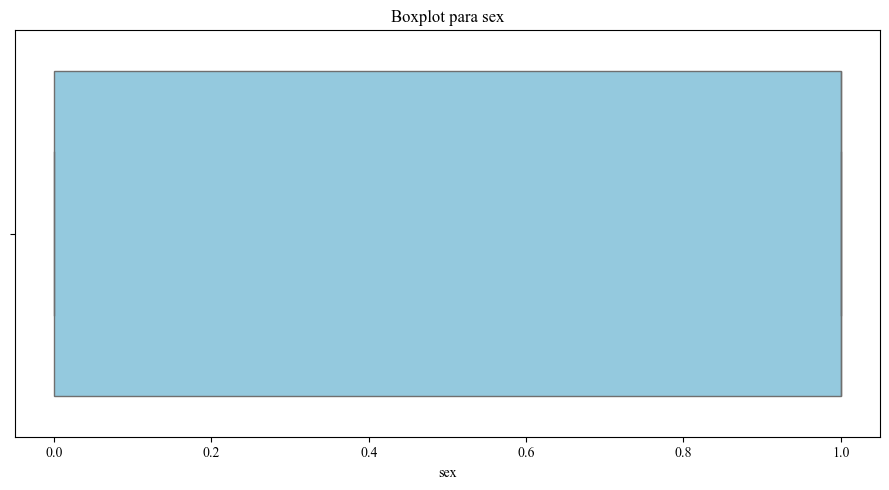


Estadísticas para cp:
Q1 - 1.5IQR = 0.50
Q1 = 2.00
Mediana = 2.00
Q3 = 3.00
Q3 + 1.5IQR = 4.50
Número de observaciones: 297
Número de outliers: 23


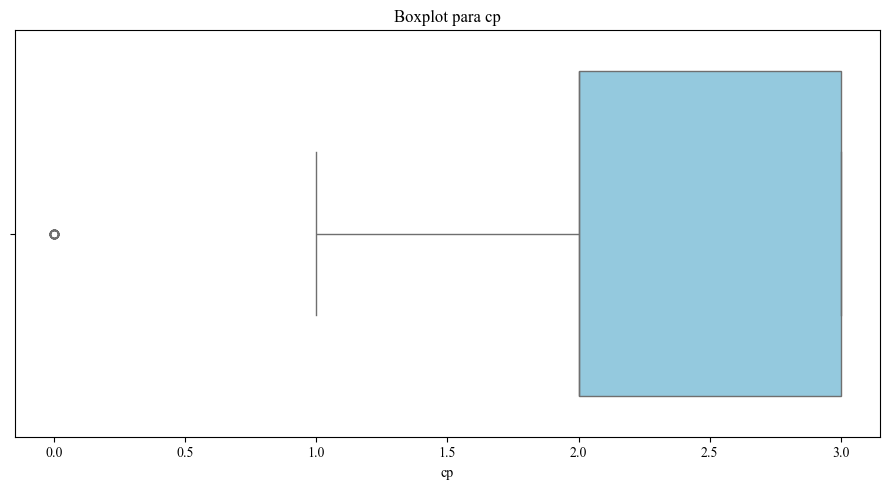


Estadísticas para trestbps:
Q1 - 1.5IQR = 90.00
Q1 = 120.00
Mediana = 130.00
Q3 = 140.00
Q3 + 1.5IQR = 170.00
Número de observaciones: 297
Número de outliers: 9


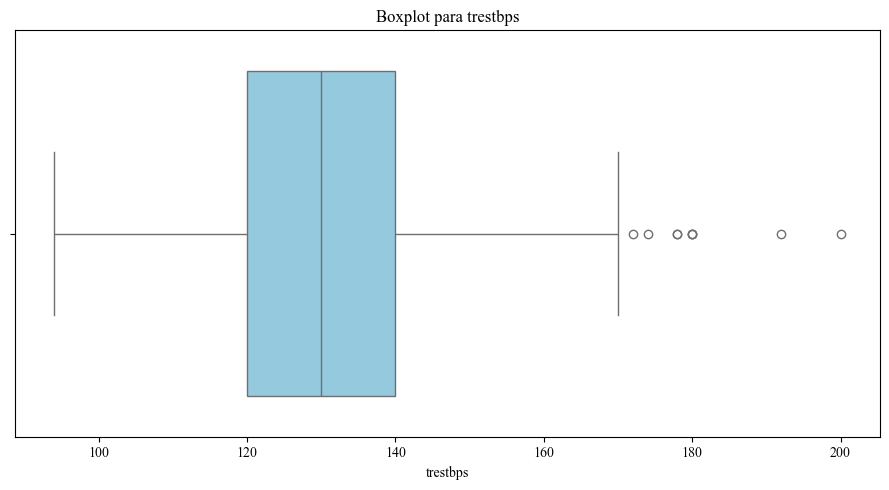


Estadísticas para chol:
Q1 - 1.5IQR = 113.50
Q1 = 211.00
Mediana = 243.00
Q3 = 276.00
Q3 + 1.5IQR = 373.50
Número de observaciones: 297
Número de outliers: 5


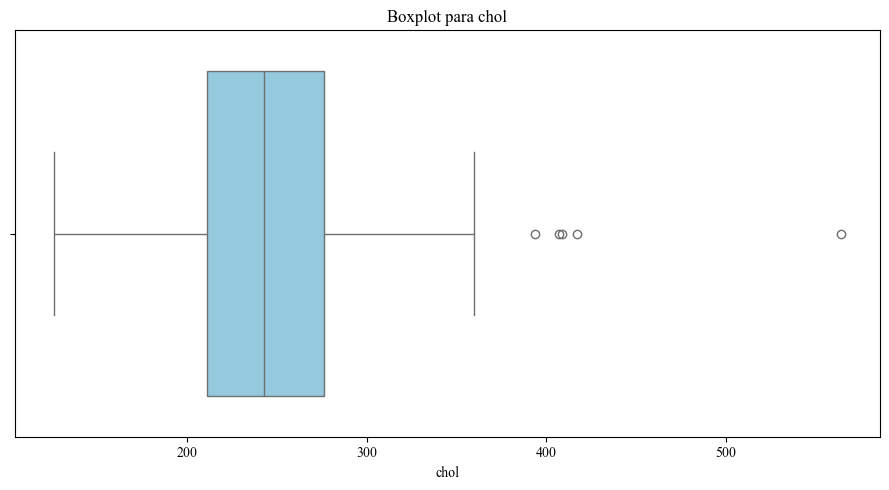


Estadísticas para fbs:
Q1 - 1.5IQR = 0.00
Q1 = 0.00
Mediana = 0.00
Q3 = 0.00
Q3 + 1.5IQR = 0.00
Número de observaciones: 297
Número de outliers: 43


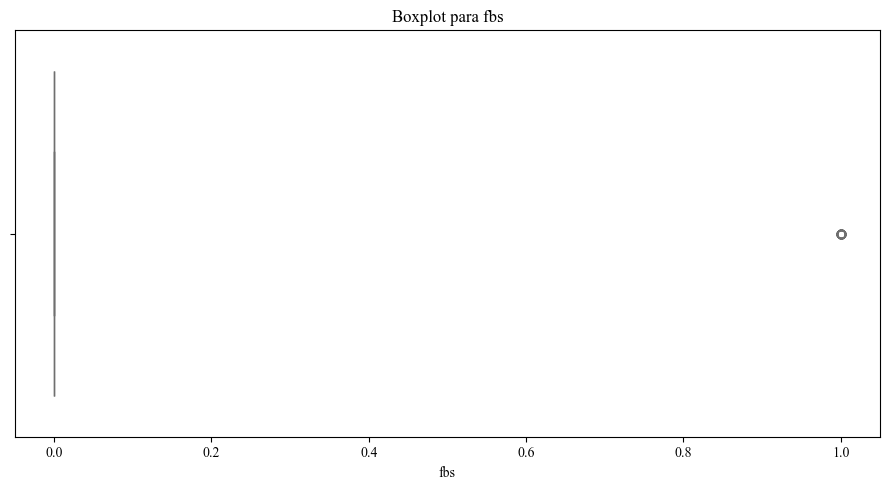


Estadísticas para restecg:
Q1 - 1.5IQR = -3.00
Q1 = 0.00
Mediana = 1.00
Q3 = 2.00
Q3 + 1.5IQR = 5.00
Número de observaciones: 297
Número de outliers: 0


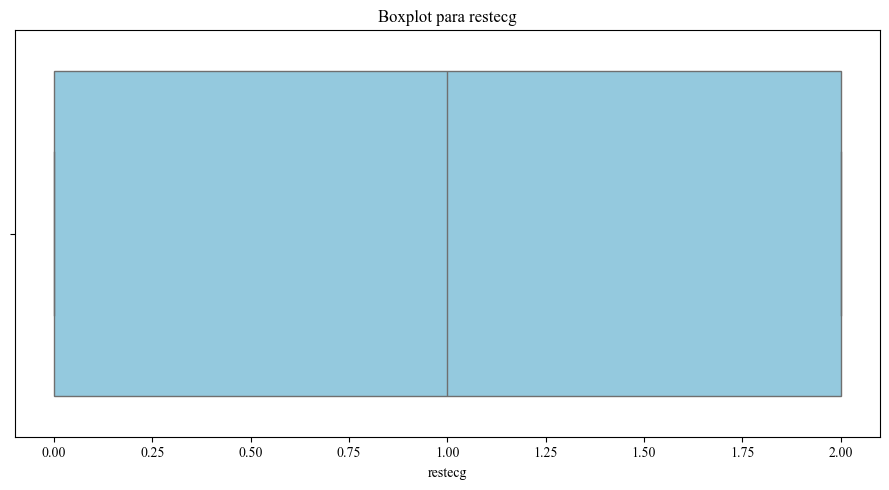


Estadísticas para thalach:
Q1 - 1.5IQR = 83.50
Q1 = 133.00
Mediana = 153.00
Q3 = 166.00
Q3 + 1.5IQR = 215.50
Número de observaciones: 297
Número de outliers: 1


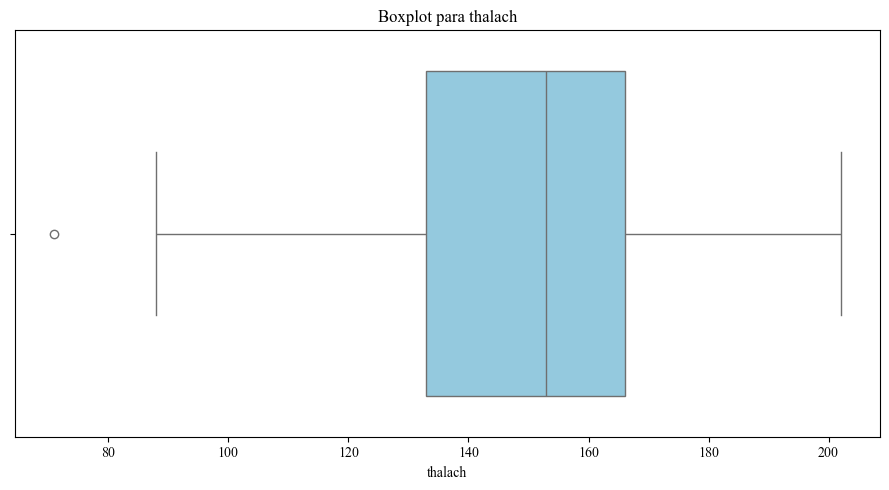


Estadísticas para exang:
Q1 - 1.5IQR = -1.50
Q1 = 0.00
Mediana = 0.00
Q3 = 1.00
Q3 + 1.5IQR = 2.50
Número de observaciones: 297
Número de outliers: 0


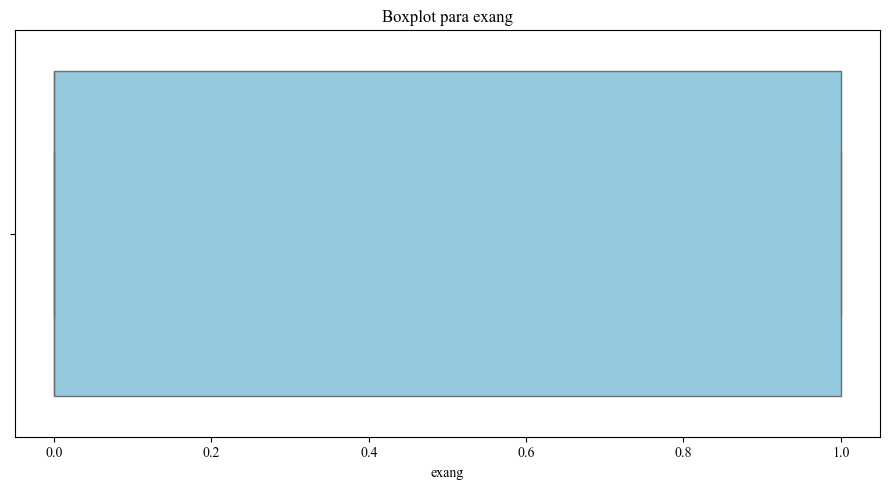


Estadísticas para oldpeak:
Q1 - 1.5IQR = -2.40
Q1 = 0.00
Mediana = 0.80
Q3 = 1.60
Q3 + 1.5IQR = 4.00
Número de observaciones: 297
Número de outliers: 5


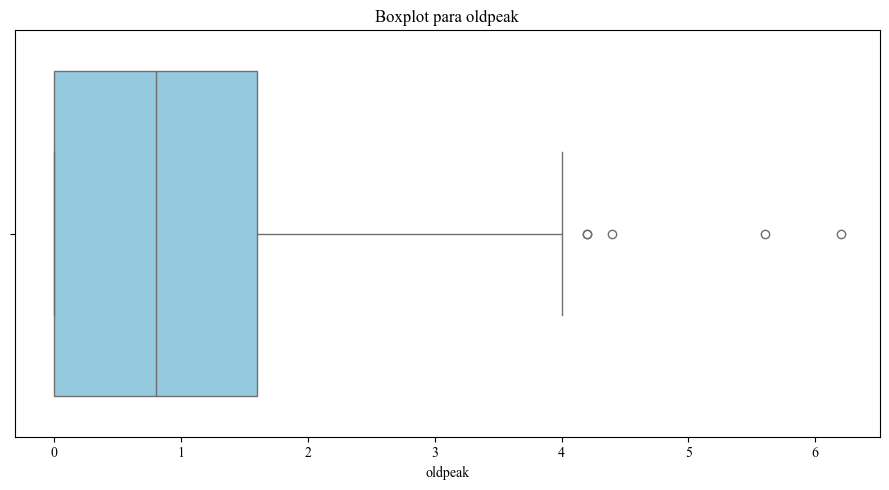


Estadísticas para slope:
Q1 - 1.5IQR = -1.50
Q1 = 0.00
Mediana = 1.00
Q3 = 1.00
Q3 + 1.5IQR = 2.50
Número de observaciones: 297
Número de outliers: 0


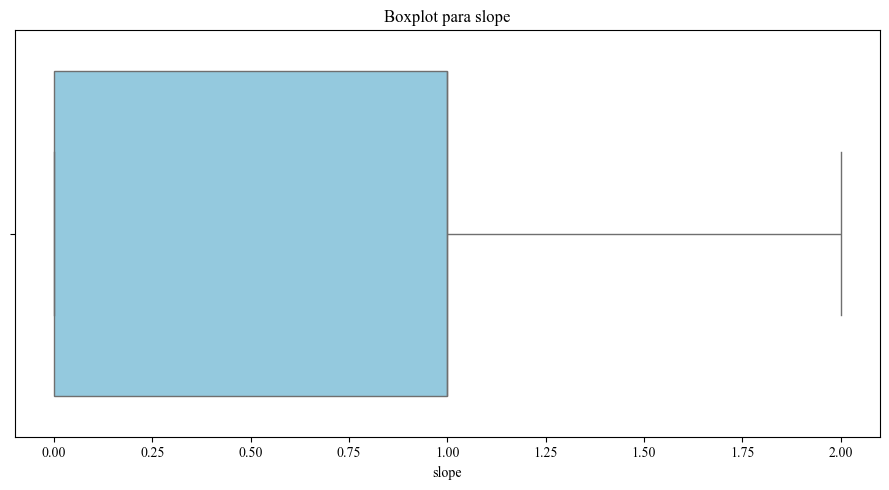


Estadísticas para ca:
Q1 - 1.5IQR = -1.50
Q1 = 0.00
Mediana = 0.00
Q3 = 1.00
Q3 + 1.5IQR = 2.50
Número de observaciones: 297
Número de outliers: 20


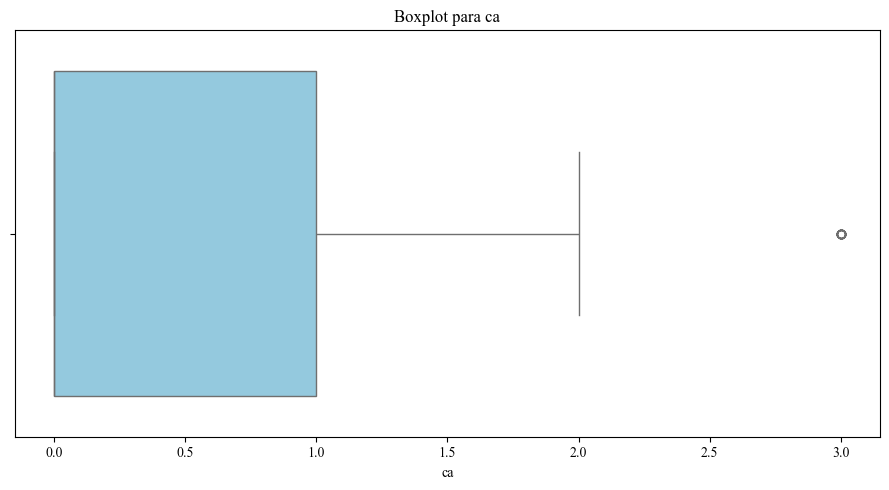


Estadísticas para thal:
Q1 - 1.5IQR = -3.00
Q1 = 0.00
Mediana = 0.00
Q3 = 2.00
Q3 + 1.5IQR = 5.00
Número de observaciones: 297
Número de outliers: 0


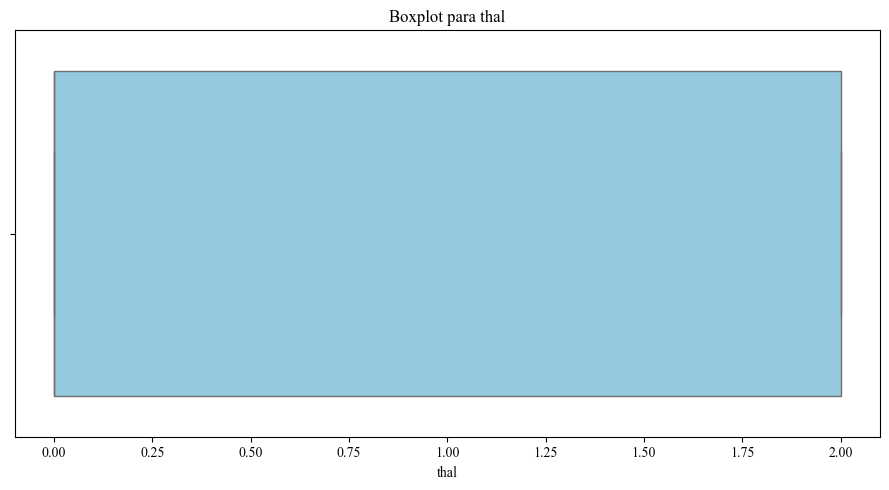

In [17]:
features = [col for col in df_heart.select_dtypes(include='number').columns if col != 'condition']

# Función para analizar y graficar outliers usando el método del IQR
def analize_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)]
    
    print(f"\nEstadísticas para {columna}:")
    print(f"Q1 - 1.5IQR = {lower_bound:.2f}")
    print(f"Q1 = {Q1:.2f}")
    print(f"Mediana = {df[columna].median():.2f}")
    print(f"Q3 = {Q3:.2f}")
    print(f"Q3 + 1.5IQR = {upper_bound:.2f}")
    print(f"Número de observaciones: {len(df[columna])}")
    print(f"Número de outliers: {len(outliers)}")

    # Gráfico de caja (boxplot individual)
    plt.figure(figsize=(9, 5))
    sns.boxplot(x=df[columna], color='skyblue')
    plt.title(f'Boxplot para {columna}')
    plt.xlabel(columna)
    plt.tight_layout()
    plt.show()
    
    return outliers

# Diccionario para guardar outliers por variable
outliers_dict = {}

for col in features:
    outliers = analize_outliers(df_heart, col)
    outliers_dict[col] = outliers

In [21]:
# Filtrar solo los datos dentro de los rangos válidos
df_model = df_heart.copy()

df_model.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [23]:
df_model.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [25]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [27]:
X = df_model.drop('condition', axis=1)
y = df_model['condition']


In [29]:

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
mask = selector.pvalues_ < 0.05
selected = X.loc[:, mask]

# Dividir dataset
X_train, X_test, y_train, y_test = train_test_split(
    selected, y, test_size=0.2, stratify=y, random_state=42
)

selected


,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,2,131,0,0.1,1,1,0
1,69,0,0,140,0,151,0,1.8,0,2,0
2,66,0,0,150,0,114,0,2.6,2,0,0
3,65,1,0,138,2,174,0,1.4,1,1,0
4,64,1,0,110,2,144,1,1.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,0,181,0,0.0,0,0,2
293,39,1,3,118,0,140,0,1.2,1,0,2
294,35,1,3,120,0,130,1,1.6,1,0,2
295,35,0,3,138,0,182,0,1.4,0,0,0


In [31]:
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Reporte
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60



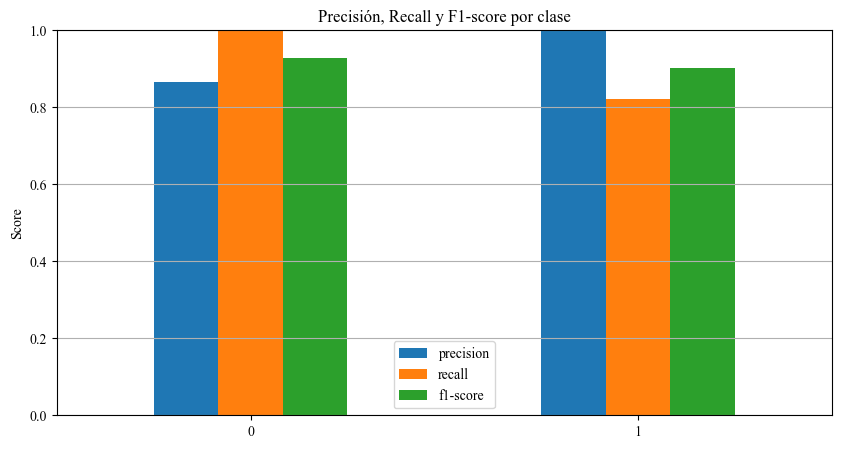

In [33]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report.iloc[:-3, :3].plot(kind='bar', figsize=(10, 5))  # sin avg totals
plt.title("Precisión, Recall y F1-score por clase")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.show()

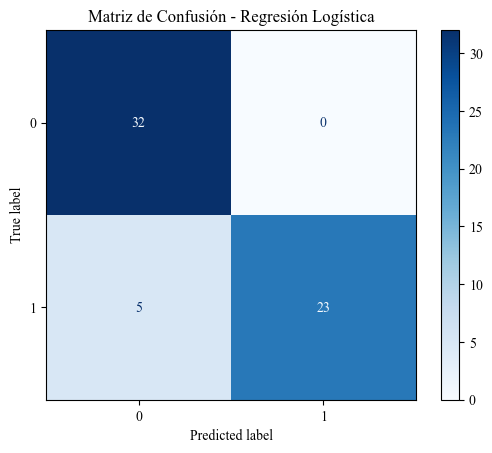

In [35]:

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

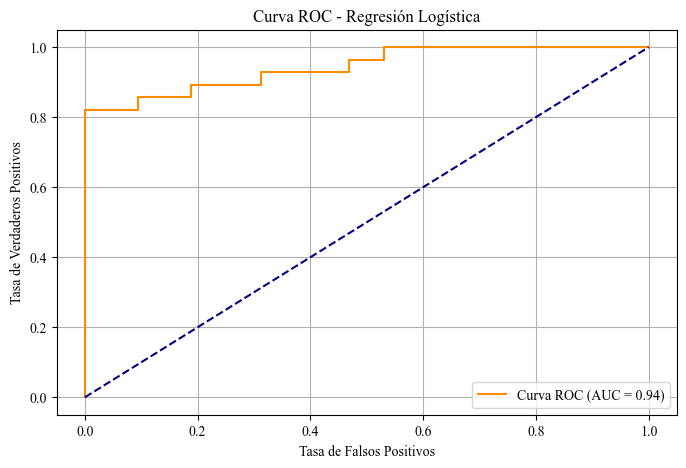

In [37]:
# Curva ROC y AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

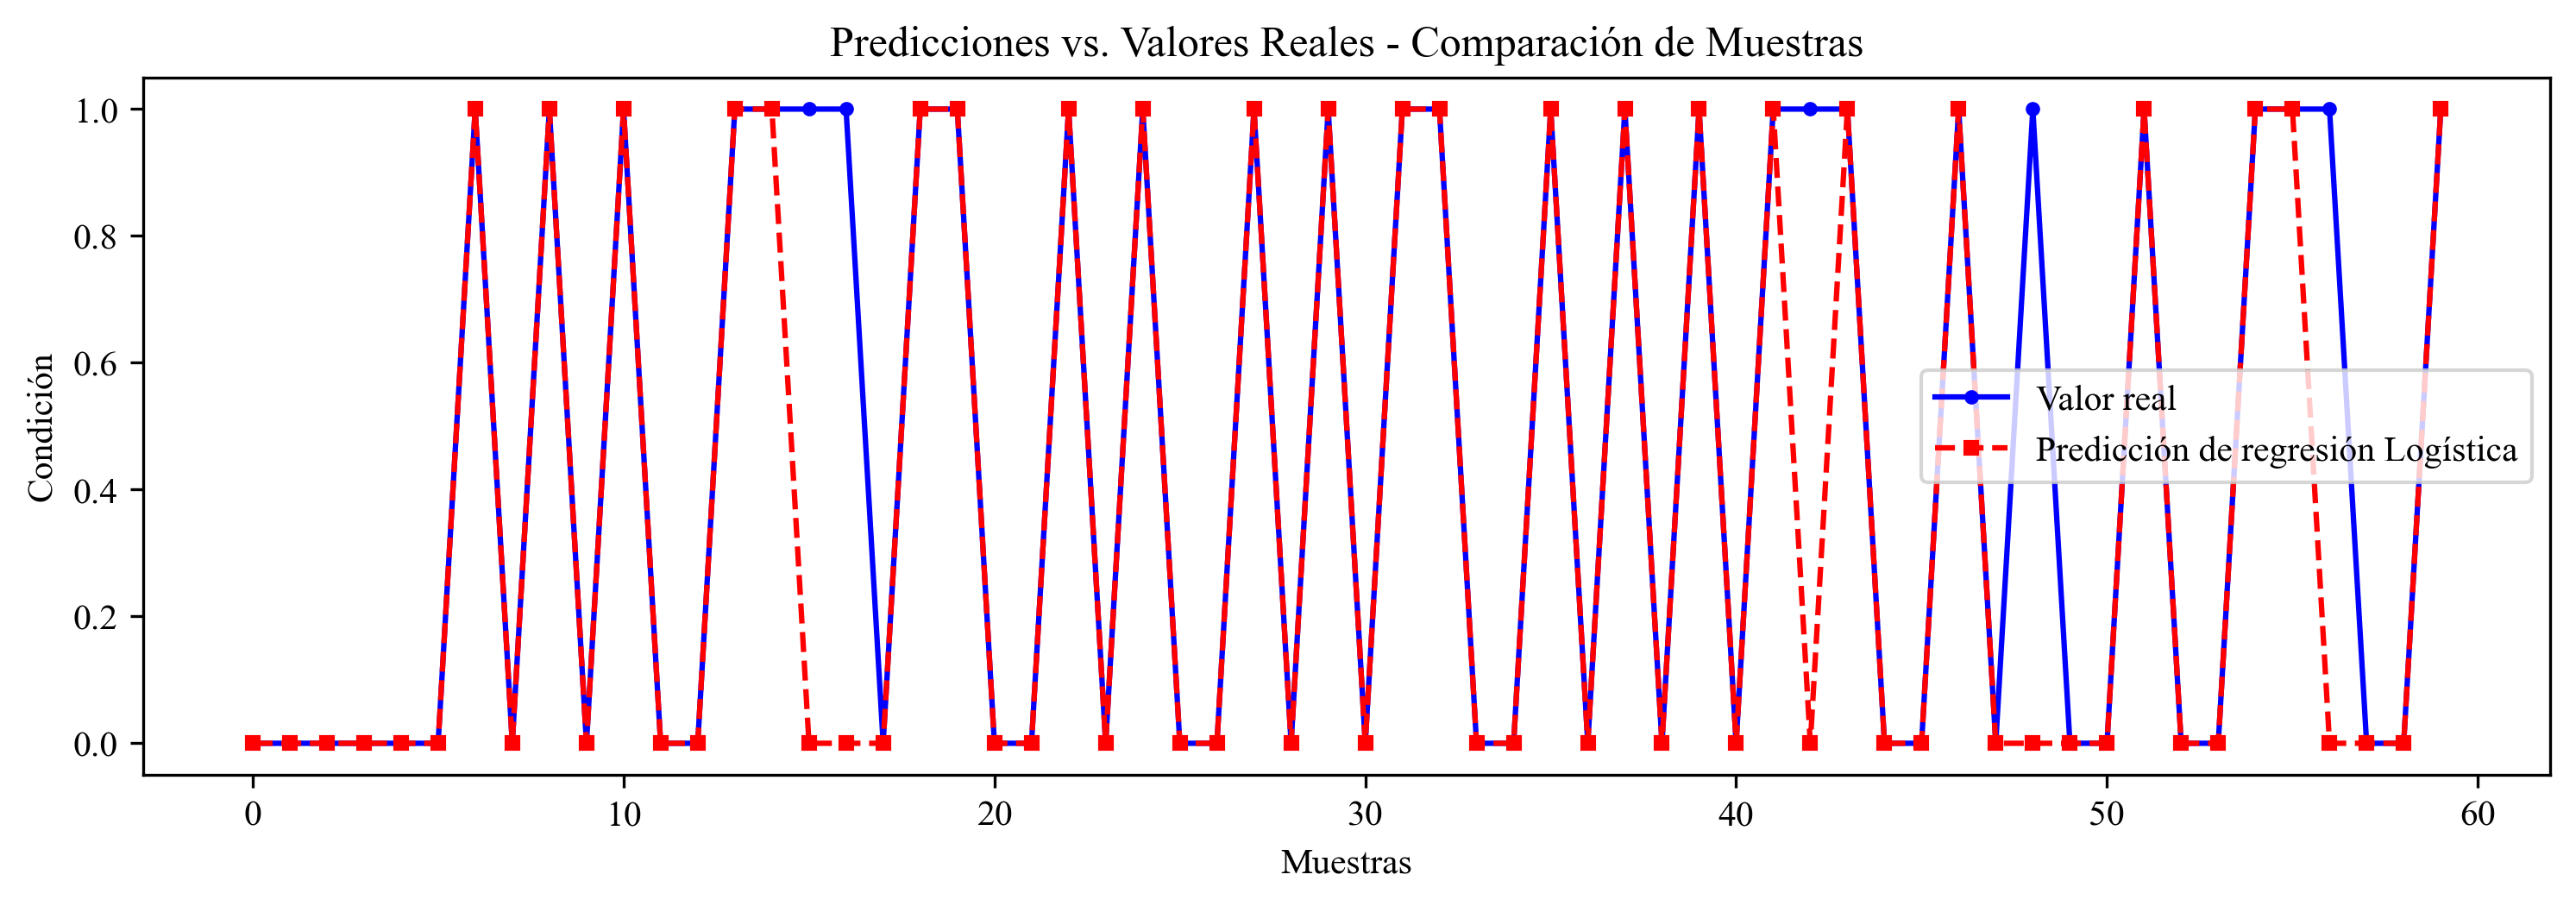

In [39]:
# Gráfico: Comparación por muestra 
fig, ax = plt.subplots(figsize=(12, 3.5), dpi=300)
plt.rcParams["font.family"] = "Times New Roman"

line1, = ax.plot(range(len(y_test)), y_test, '-b', label='Valor real', marker='.')
line2, = ax.plot(range(len(y_pred)), y_pred, 'r', label='Predicción de regresión Logística',
                 marker='s', linestyle='--', markersize=3.5)

ax.legend(handles=[line1, line2], loc='best')
plt.xlabel('Muestras')
plt.ylabel('Condición')
plt.title("Predicciones vs. Valores Reales - Comparación de Muestras")
plt.show()